In [144]:
# Import packages

import numpy as np
import pandas as pd
from nlb_tools.nwb_interface import NWBDataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [98]:
# Load the data

dataset = NWBDataset("../Data/000140/sub-Jenkins/", "*train", split_heldout=False)

In [99]:
# Read the data

dataset.data

signal_type             cursor_pos            eye_pos           hand_pos  \
channel                          x          y       x      y           x   
clock_time                                                                 
0 days 00:00:00          -4.100000   3.000000   -11.9   -5.6   -4.069391   
0 days 00:00:00.001000   -4.073506   3.007478   -10.1   -5.9   -4.066941   
0 days 00:00:00.002000   -4.048922   3.012831   -10.2   -4.1   -4.064521   
0 days 00:00:00.003000   -4.027829   3.014146   -10.0   -5.6   -4.062168   
0 days 00:00:00.004000   -4.011346   3.010063   -10.5   -8.8   -4.059822   
...                            ...        ...     ...    ...         ...   
0 days 00:04:53.661000 -116.401677 -78.966218  -129.1 -123.8 -116.515944   
0 days 00:04:53.662000 -116.413528 -78.938493  -129.2 -123.5 -116.518153   
0 days 00:04:53.663000 -116.436155 -78.918935  -129.2 -123.5 -116.520040   
0 days 00:04:53.664000 -116.466842 -78.907063  -129.4 -124.1 -116.521716   
0 days 00:04:53.665000 -116.500000 -78.900000  -129.4 -123.6 -116.523146   

signal_type                         hand_vel            spikes       ...       \
channel                          y         x          y   1011 1012  ... 2791   
clock_time                                                           ...        
0 days 00:00:00         -31.888893  2.450720 -11.829852    0.0  0.0  ...  0.0   
0 days 00:00:00.001000  -31.900723  2.435183 -12.043778    0.0  0.0  ...  0.0   
0 days 00:00:00.002000  -31.912980  2.386269 -12.389198    0.0  0.0  ...  0.0   
0 days 00:00:00.003000  -31.925501  2.349501 -12.565892    0.0  0.0  ...  0.0   
0 days 00:00:00.004000  -31.938112  2.333177 -12.663237    0.0  0.0  ...  0.0   
...                            ...       ...        ...    ...  ...  ...  ...   
0 days 00:04:53.661000 -113.892508 -2.313490   5.483961    0.0  0.0  ...  0.0   
0 days 00:04:53.662000 -113.887462 -2.048251   4.601440    0.0  0.0  ...  0.0   
0 days 00:04:53.663000 -113.883305 -1.781295   3.695670    0.0  0.0  ...  0.0   
0 days 00:04:53.664000 -113.880071 -1.552728   2.898661    0.0  0.0  ...  0.0   
0 days 00:04:53.665000 -113.877507 -1.429880   2.563202    0.0  0.0  ...  0.0   

signal_type                                                          
channel                2792 2801 2802 2812 2821 2841 2842 2861 2951  
clock_time                                                           
0 days 00:00:00         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.001000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.002000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.003000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.004000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  
0 days 00:04:53.661000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:04:53.662000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
0 days 00:04:53.663000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:04:53.664000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:04:53.665000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[293666 rows x 150 columns]

In [100]:
# Check the time bins

dataset.bin_width

1

In [101]:
# Check the trial information

dataset.trial_info

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split
0,0,0 days 00:00:00,0 days 00:00:03.421000,11,1,76,True,0 days 00:00:00.848000,0 days 00:00:01.413000,0 days 00:00:02.171000,758,565,1,"[[-118, -83]]",9,"[[-33, 47, 37, 6], [-77, 48, 61, 11], [-64, -2...",0,val
1,1,0 days 00:00:03.500000,0 days 00:00:05.631000,12,0,77,True,0 days 00:00:04.176000,0 days 00:00:04.324000,0 days 00:00:04.580000,256,148,1,"[[-77, 82]]",0,[],0,train
2,2,0 days 00:00:05.700000,0 days 00:00:08.536000,4,1,4,True,0 days 00:00:06.359000,0 days 00:00:06.540000,0 days 00:00:06.910000,370,181,1,"[[-100, 35]]",9,"[[100, 38, 63, 14], [-146, 90, 54, 10], [51, 1...",0,train
3,3,0 days 00:00:08.600000,0 days 00:00:11.746000,8,2,10,True,0 days 00:00:09.361000,0 days 00:00:10.259000,0 days 00:00:10.607000,348,898,3,"[[-92, 81], [-91, -70], [117, 15]]",9,"[[-119, 48, 72, 8], [-47, 68, 9, 20], [-36, -8...",1,val
4,4,0 days 00:00:11.800000,0 days 00:00:14.706000,7,2,8,True,0 days 00:00:12.593000,0 days 00:00:13.225000,0 days 00:00:13.550000,325,632,3,"[[-92, 81], [-91, -70], [117, 15]]",9,"[[-119, 48, 72, 8], [-47, 68, 9, 20], [-36, -8...",0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0 days 00:04:38.600000,0 days 00:04:42.021000,11,2,76,True,0 days 00:04:39.552000,0 days 00:04:40.500000,0 days 00:04:40.837000,337,948,3,"[[133, -81], [-118, -83], [-77, 82]]",9,"[[-33, 47, 37, 6], [-77, 48, 61, 11], [-64, -2...",1,val
96,96,0 days 00:04:42.100000,0 days 00:04:44.466000,4,0,4,True,0 days 00:04:42.963000,0 days 00:04:43.161000,0 days 00:04:43.427000,266,198,1,"[[-100, 35]]",0,[],0,train
97,97,0 days 00:04:44.500000,0 days 00:04:47.376000,3,2,3,True,0 days 00:04:45.410000,0 days 00:04:45.892000,0 days 00:04:46.242000,350,482,3,"[[-100, 35], [125, -64], [104, 80]]",9,"[[100, 38, 63, 14], [-146, 90, 54, 10], [51, 1...",1,val
98,98,0 days 00:04:47.400000,0 days 00:04:50.736000,3,1,3,True,0 days 00:04:48.323000,0 days 00:04:49.238000,0 days 00:04:49.545000,307,915,1,"[[125, -64]]",9,"[[100, 38, 63, 14], [-146, 90, 54, 10], [51, 1...",0,val


In [102]:
# Check data description

dataset.descriptions

{'start_time': 'Start time of epoch, in seconds',
 'stop_time': 'Stop time of epoch, in seconds',
 'trial_type': 'A number representing the maze configuration that was used for the trial',
 'trial_version': 'A number 0-2 indicating which variant of the maze is presented. 0 is 1-target no-barrier, 1 is 1-target with barriers, 2 is 3-target with barriers',
 'maze_id': 'A unique identifier for each maze, lumping all 3 `trial_version`s. `trial_type` is not unique across datasets, but `maze_id` is',
 'success': 'If the monkey was successful on the trial. In these benchmark files, all unsuccessful trials have been removed',
 'target_on_time': 'Time of target presentation, as detected by the photobox',
 'go_cue_time': 'Time of go cue delivery, as detected by the photobox',
 'move_onset_time': 'Time of movement onset, calculated offline using a robust algorithm',
 'rt': 'Delay between go cue and movement onset',
 'delay': 'Delay between target presentation and go cue, in ms',
 'num_targets': '

In [103]:
# # resample time bins from 1ms to 5ms

# dataset.resample(5)

In [104]:
# make trial dataset

dataset.make_trial_data()

align_time             clock_time  cursor_pos             \
                                                               x          y   
0             0 days 00:00:00        0 days 00:00:00   -4.100000   3.000000   
1      0 days 00:00:00.001000 0 days 00:00:00.001000   -4.073506   3.007478   
2      0 days 00:00:00.002000 0 days 00:00:00.002000   -4.048922   3.012831   
3      0 days 00:00:00.003000 0 days 00:00:00.003000   -4.027829   3.014146   
4      0 days 00:00:00.004000 0 days 00:00:00.004000   -4.011346   3.010063   
...                       ...                    ...         ...        ...   
287705 0 days 00:00:02.861000 0 days 00:04:53.661000 -116.401677 -78.966218   
287706 0 days 00:00:02.862000 0 days 00:04:53.662000 -116.413528 -78.938493   
287707 0 days 00:00:02.863000 0 days 00:04:53.663000 -116.436155 -78.918935   
287708 0 days 00:00:02.864000 0 days 00:04:53.664000 -116.466842 -78.907063   
287709 0 days 00:00:02.865000 0 days 00:04:53.665000 -116.500000 -78.900000   

       eye_pos           hand_pos              hand_vel             ...  \
             x      y           x           y         x          y  ...   
0        -11.9   -5.6   -4.069391  -31.888893  2.450720 -11.829852  ...   
1        -10.1   -5.9   -4.066941  -31.900723  2.435183 -12.043778  ...   
2        -10.2   -4.1   -4.064521  -31.912980  2.386269 -12.389198  ...   
3        -10.0   -5.6   -4.062168  -31.925501  2.349501 -12.565892  ...   
4        -10.5   -8.8   -4.059822  -31.938112  2.333177 -12.663237  ...   
...        ...    ...         ...         ...       ...        ...  ...   
287705  -129.1 -123.8 -116.515944 -113.892508 -2.313490   5.483961  ...   
287706  -129.2 -123.5 -116.518153 -113.887462 -2.048251   4.601440  ...   
287707  -129.2 -123.5 -116.520040 -113.883305 -1.781295   3.695670  ...   
287708  -129.4 -124.1 -116.521716 -113.880071 -1.552728   2.898661  ...   
287709  -129.4 -123.6 -116.523146 -113.877507 -1.429880   2.563202  ...   

       spikes                                    trial_id  \
         2801 2802 2812 2821 2841 2842 2861 2951            
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
...       ...  ...  ...  ...  ...  ...  ...  ...      ...   
287705    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       99   
287706    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0       99   
287707    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       99   
287708    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       99   
287709    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       99   

                   trial_time  
                               
0             0 days 00:00:00  
1      0 days 00:00:00.001000  
2      0 days 00:00:00.002000  
3      0 days 00:00:00.003000  
4      0 days 00:00:00.004000  
...                       ...  
287705 0 days 00:00:02.861000  
287706 0 days 00:00:02.862000  
287707 0 days 00:00:02.863000  
287708 0 days 00:00:02.864000  
287709 0 days 00:00:02.865000  

[287710 rows x 155 columns]

## Plot Trial Averaged Reaches

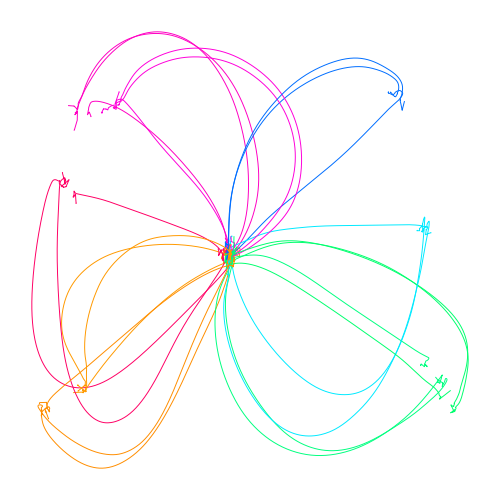

In [105]:
## Plot trial-averaged reaches

# Find unique conditions
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()

counter = 0
# Initialize plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond in conds:
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # print(mask.sum())               # print the number of trials that satisfy the condition
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field = 'move_onset_time', ignored_trials = (~mask))
    # Average hand position across trials
    traj = trial_data.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determing reach ange for color
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    plt.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle/(2*np.pi) + 0.5))
    counter += 1
# print(counter)
plt.axis('off')
plt.show()

 For each time point, the position of the hand is averaged across all trials of that condition, resulting in a single trajectory that represents the average behavior for that condition

## Plot Hand Trajectory For Each Trial for One Condition

To visualize what each hand trajectory looks like before it is averaged(aligned) for all trials for a condition which was then done for multiple conditions

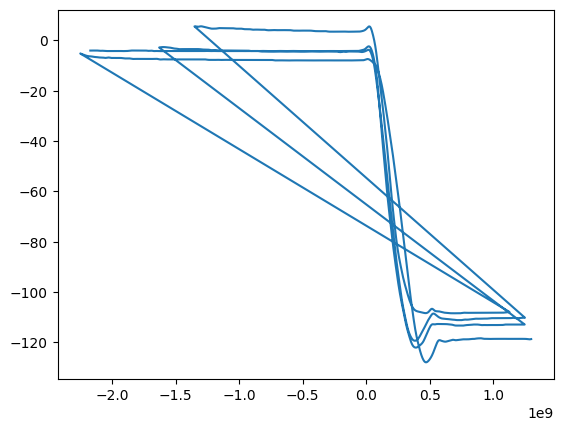

In [106]:
cond_t = (11, 1)
mask_t = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond_t, axis=1)
# print(mask_t.sum())       print to clarify the number of trials that obey this condition
trial_data_t = dataset.make_trial_data(align_field = 'move_onset_time', ignored_trials = (~mask_t))
plt.plot(trial_data_t['align_time'], trial_data_t[('hand_pos', 'x')])
plt.show()

## Single-neuron responses



A "PSTH" (peristimulus time histogram) is a common tool used in neuroscience to visualize the temporal pattern of spiking activity of a neuron in response to a particular stimulus or event. It is a histogram of the number of spikes that occur within a small time bin (e.g., 1 ms) relative to the onset of the stimulus or event.

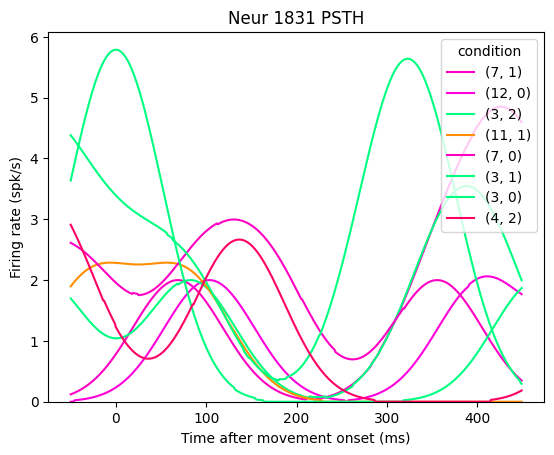

In [107]:
## Plot PSTHs

# Seed generator for consistent plots
np.random.seed(2468)
n_conds = 8 # number of conditions to plot

# Smooth spikes with 50 ms std Gaussian
dataset.smooth_spk(50, name='smth_50')

# Plot random neuron
neur_num = np.random.choice(dataset.data.spikes.columns)

# Find unique conditions
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()

# Plot random subset of conditions
for i in np.random.choice(len(conds), size=n_conds, replace=False):
    cond = conds[i]
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
    # Average hand position across trials
    psth = trial_data.groupby('align_time')[[('spikes_smth_50', neur_num)]].mean().to_numpy() / dataset.bin_width * 1000
    # Color PSTHs by reach angle
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    plt.plot(np.arange(-50, 450, dataset.bin_width), psth, label=cond, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))

# Add labels
plt.ylim(bottom=0)
plt.xlabel('Time after movement onset (ms)')
plt.ylabel('Firing rate (spk/s)')
plt.title(f'Neur {neur_num} PSTH')
plt.legend(title='condition', loc='upper right')
plt.show()

According to the template notebook, averaging across trials which was done here discards single trial variability as noise. Why is that bad?

## Decoding Hand Kinematics

In [108]:
rates.shape

(42000, 142)

In [109]:
lagged_trial_data.hand_vel

,x,y
0,12.476680,6.573311
1,12.875990,6.632128
2,13.409843,6.730215
3,13.731506,6.849054
4,13.841576,6.951645
...,...,...
49995,-3.777839,3.332862
49996,-3.290496,3.513776
49997,-2.937590,3.696902
49998,-2.681607,3.828885


In [114]:
trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-130, 370))
lagged_trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450))
rates = trial_data.spikes_smth_50.to_numpy()
print(rates.shape)
vel = lagged_trial_data.hand_vel.to_numpy()
print(vel.shape)

# Fit and evaluate decoder
gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 0, 5)})
print(np.logspace(-4, 0, 5))
gscv.fit(rates, vel)
pred_vel = gscv.predict(rates)
print(f"Decoding R2: {gscv.best_score_}")

# Merge predictins back to continuous data
# pred_vel_df = pd.DataFrame(pred_vel, index=lagged_trial_data.clock_time, columns=pd.MultiIndex.from_tuples([('pred_vel', 'x'), ('pred_vel', 'y')]))
# dataset.data = pd.concat([dataset.data, pred_vel_df], axis=1)

(50000, 142)
(50000, 2)
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
Decoding R2: 0.464239622693842


In [150]:
trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-130, 370))
lagged_trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450))
rates = trial_data.spikes_smth_50.to_numpy()
vel = lagged_trial_data.hand_vel.to_numpy()

# Fit and evaluate decoder
gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 0, 5)})
gscv.fit(rates, vel)
pred_vel = gscv.predict(rates)
print(f"Decoding R2: {gscv.best_score_}")

# Merge predictins back to continuous data
pred_vel_df = pd.DataFrame(pred_vel, index=lagged_trial_data.clock_time, columns=pd.MultiIndex.from_tuples([('pred_vel', 'x'), ('pred_vel', 'y')]))
dataset.data = pd.concat([dataset.data, pred_vel_df], axis=1)

Decoding R2: 0.5327346428176577


In [157]:
addons

array([ 80, 130, 180, 230, 280, 330, 380, 430, 480])

Decoding R2: 0.006166119574621076
Decoding R2: 0.06426101919899961
Decoding R2: 0.07831224744024437
Decoding R2: 0.03834106227076798
Decoding R2: 0.051212458181243134
Decoding R2: 0.07158609499609772
Decoding R2: 0.09289473016722778
Decoding R2: 0.12020508408893567
Decoding R2: 0.15797072515699848
Decoding R2: 0.20540890045718455
Decoding R2: 0.25744039245026223
Decoding R2: 0.3106068953332814
Decoding R2: 0.3594254189444374
Decoding R2: 0.3992832752778443
Decoding R2: 0.42762690277494314
Decoding R2: 0.4439573554031601
Decoding R2: 0.4504560199051982
Decoding R2: 0.4491411637047472
Decoding R2: 0.44230854391246377
Decoding R2: 0.4329278199512269
Decoding R2: 0.4246243900770059
Decoding R2: 0.42155620755495676
Decoding R2: 0.4272672631039402
Decoding R2: 0.4420392265154378
Decoding R2: 0.464239622693842
Decoding R2: 0.4904724110057449
Decoding R2: 0.518633372856971
Decoding R2: 0.545780818077196
Decoding R2: 0.5645503574778916
Decoding R2: 0.5673127141487045
Decoding R2: 0.552666458256

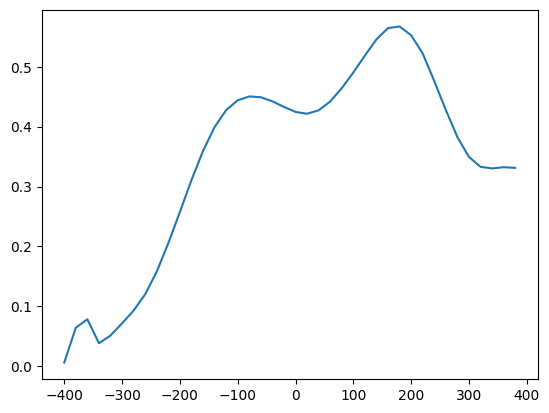

In [168]:
x1 = -130
x2 = 370
addons = np.arange(-400, 400, 20)
R2 = []

for x in addons:
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(x1, x2))
    lagged_trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(x1+x, x2+x))
    rates = trial_data.spikes_smth_50.to_numpy()
    vel = lagged_trial_data.hand_vel.to_numpy()
    
    gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 0, 5)})
    gscv.fit(rates, vel)
    pred_vel = gscv.predict(rates)
    print(f"Decoding R2: {gscv.best_score_}")
    R2.append(gscv.best_score_)
    
plt.plot(addons, R2)
plt.show()

In [166]:
cond = conds[23]

mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
trial_data = datset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials(~mask))

# Initialize figure



0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool